#CafChem tools for generating conformers and testing the pharmacophore features of a molecule against a known active.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MauricioCafiero/CafChem/blob/main/notebooks/Pharmacophores_CafChem.ipynb)

## This notebook allows you to:
- Generate conformers of a list of molecules.
- test a single conformer against a known active.
- test all conformers against a known active.

## Requirements:
- This notebook will install rdkit and py3Dmol.
- Runs on CPU or your local runtime (if you have installed py3Dmol).

Thanks to [Greg Landrum's blog](https://greglandrum.github.io/rdkit-blog/posts/2023-02-24-using-feature-maps.html).

## Set-up

### Install libraries

In [1]:
!pip install rdkit -q
! pip install py3Dmol -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.2/36.2 MB 41.3 MB/s eta 0:00:00


### Import libraries and set up parameters for Feature analysis

In [1]:
!git clone https://github.com/MauricioCafiero/CafChem.git

Cloning into 'CafChem'...
remote: Enumerating objects: 855, done.
remote: Counting objects: 100% (134/134), done.
remote: Compressing objects: 100% (76/76), done.
remote: Total 855 (delta 115), reused 58 (delta 58), pack-reused 721 (from 3)
Receiving objects: 100% (855/855), 43.17 MiB | 18.47 MiB/s, done.
Resolving deltas: 100% (489/489), done.
Updating files: 100% (66/66), done.


In [10]:
import py3Dmol
import os
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw

import CafChem.CafChemPharm as ccph

## Perform pharmacophore feature analysis
- Set up a reference molecule and test molecules

In [3]:
known = 'O=C(O)[C@@](NN)(Cc1cc(O)c(O)cc1)C'
test = 'Oc1ccc(cc1)/C=C/c2cc(O)cc(O)c2'

compare = ccph.evaluate_pharmacophore(known,test)

In [4]:
mols = compare.align_confs()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [5]:
lists, maps = compare.get_feat_lists_maps()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [6]:
score, score_norm = compare.get_feat_score()

Test score: 0.2861831306892917
Test score normalized: 0.34341975682715004


In [7]:
res_string = compare.get_feat_comparison()
print(res_string)

The Pharmacophore Features are as follows: 
known                          test                          
Donor               :          5 | Donor               :          3
Acceptor            :          4 | Acceptor            :          3
NegIonizable        :          1 | Aromatic            :          2
Aromatic            :          1 | LumpedHydrophobe    :          2
LumpedHydrophobe    :          1 | NegIonizable        :          0
PosIonizable        :          0 | PosIonizable        :          0
ZnBinder            :          0 | ZnBinder            :          0


## Conformers
- generate a defined number of conformers for a list of molecules

In [8]:
smiles = [known, test]
confs = ccph.conformers(smiles,5)

conf_mols = confs.get_confs(True)

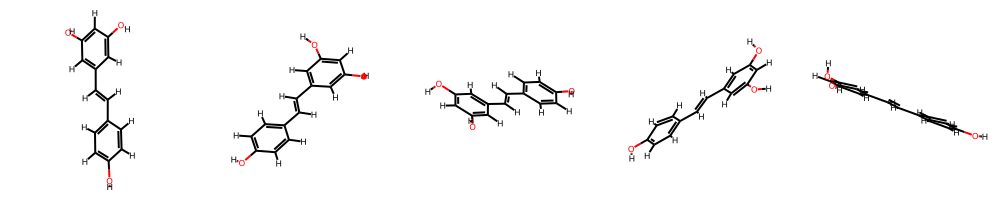

In [21]:
expanded_confs = confs.expand_all_confs()

Draw.MolsToGridImage(expanded_confs[1], molsPerRow=5, subImgSize=(200,200))

In [12]:
xyz_strings = confs.get_XYZ_strings(0)

In [13]:
print(xyz_strings[1])

30

O      2.706129    0.714378    3.996075
C      1.989534   -0.332010    3.930520
O      1.734971   -1.130159    5.030679
C      1.427520   -0.656206    2.571135
N      0.642718   -1.843903    2.609115
N     -0.445393   -1.785501    3.468586
C      0.708945    0.546066    2.045853
C      0.100572    0.392808    0.722631
C      0.768839    0.684171   -0.444987
C      0.141488    0.520109   -1.680520
O      0.863209    0.829914   -2.838105
C     -1.155957    0.065387   -1.777084
O     -1.766704   -0.092166   -3.026005
C     -1.834517   -0.229740   -0.606907
C     -1.196173   -0.060659    0.604575
C      2.640058   -0.955712    1.712899
H      1.778700   -0.702969    5.944786
H      1.269435   -2.601343    2.998839
H     -0.766811   -0.851007    3.735242
H     -1.156666   -2.491555    3.258959
H      1.417513    1.405468    2.076053
H     -0.099611    0.836296    2.765828
H      1.778738    1.041120   -0.434112
H      1.064588    0.068286   -3.474756
H     -2.367637    0.674591   -3.310

In [14]:
confs.make_xyz_files(0)

## Test all conformers for pharmacophore match
- test many conformers of a test molecule against a known

In [16]:
known = 'O=C(O)[C@@](NN)(Cc1cc(O)c(O)cc1)C'
test = 'Oc1ccc(cc1)/C=C/c2cc(O)cc(O)c2'

pharm_analysis = ccph.evaluate_pharmacophore_all_confs(known, test, 5)

In [17]:
known, test_confs = pharm_analysis.align_confs()

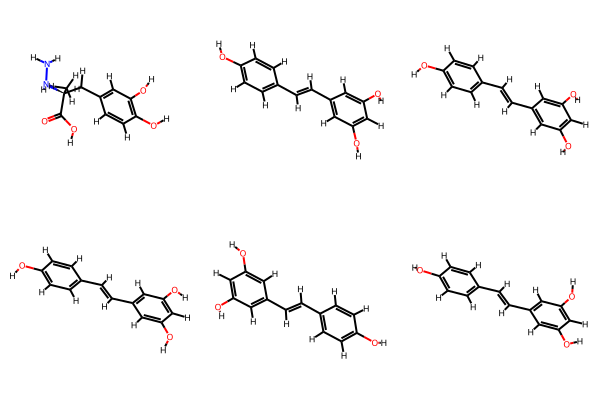

In [18]:
mols = [known, *test_confs]

Draw.MolsToGridImage(mols)

In [19]:
feats, maps = pharm_analysis.get_feat_lists_maps()

In [20]:
scores, norm_scores, props = pharm_analysis.get_feat_score()

Test score for conformation 0: 0.32008639910795683
Test score normalized for conformation 0: 0.3841036789295482
Test score for conformation 1: 0.3229745442493039
Test score normalized for conformation 1: 0.3875694530991647
Test score for conformation 2: 0.326696858333719
Test score normalized for conformation 2: 0.3920362300004628
Test score for conformation 3: 0.32064220092632195
Test score normalized for conformation 3: 0.3847706411115864
Test score for conformation 4: 0.32498145932365613
Test score normalized for conformation 4: 0.3899777511883874
The best conformation is 2
The Pharmacophore Features are as follows: 
known                          best conformation             
Donor               :          5 | Donor               :          3
Acceptor            :          4 | Acceptor            :          3
NegIonizable        :          1 | Aromatic            :          2
Aromatic            :          1 | LumpedHydrophobe    :          2
LumpedHydrophobe    :          1 | Neg